# What is dimensionality reduction?
Before we consider reducing the dimensionality of a dataset, we should learn what dimensionality is. Simply, dimensionality is the number of input features (variables) in a dataset. Often, it can be thought as the number of columns (except the label column) in a dataset. The following table shows a part of the iris dataset which contains four features. So, the number of dimensions is four. This means, for example, to demonstrate the first data point in the four-dimensional space, we use p1(5.1, 3.5, 1.4, 0.2) notation.

**Dimensionality reduction means reducing the number of features in a dataset.**
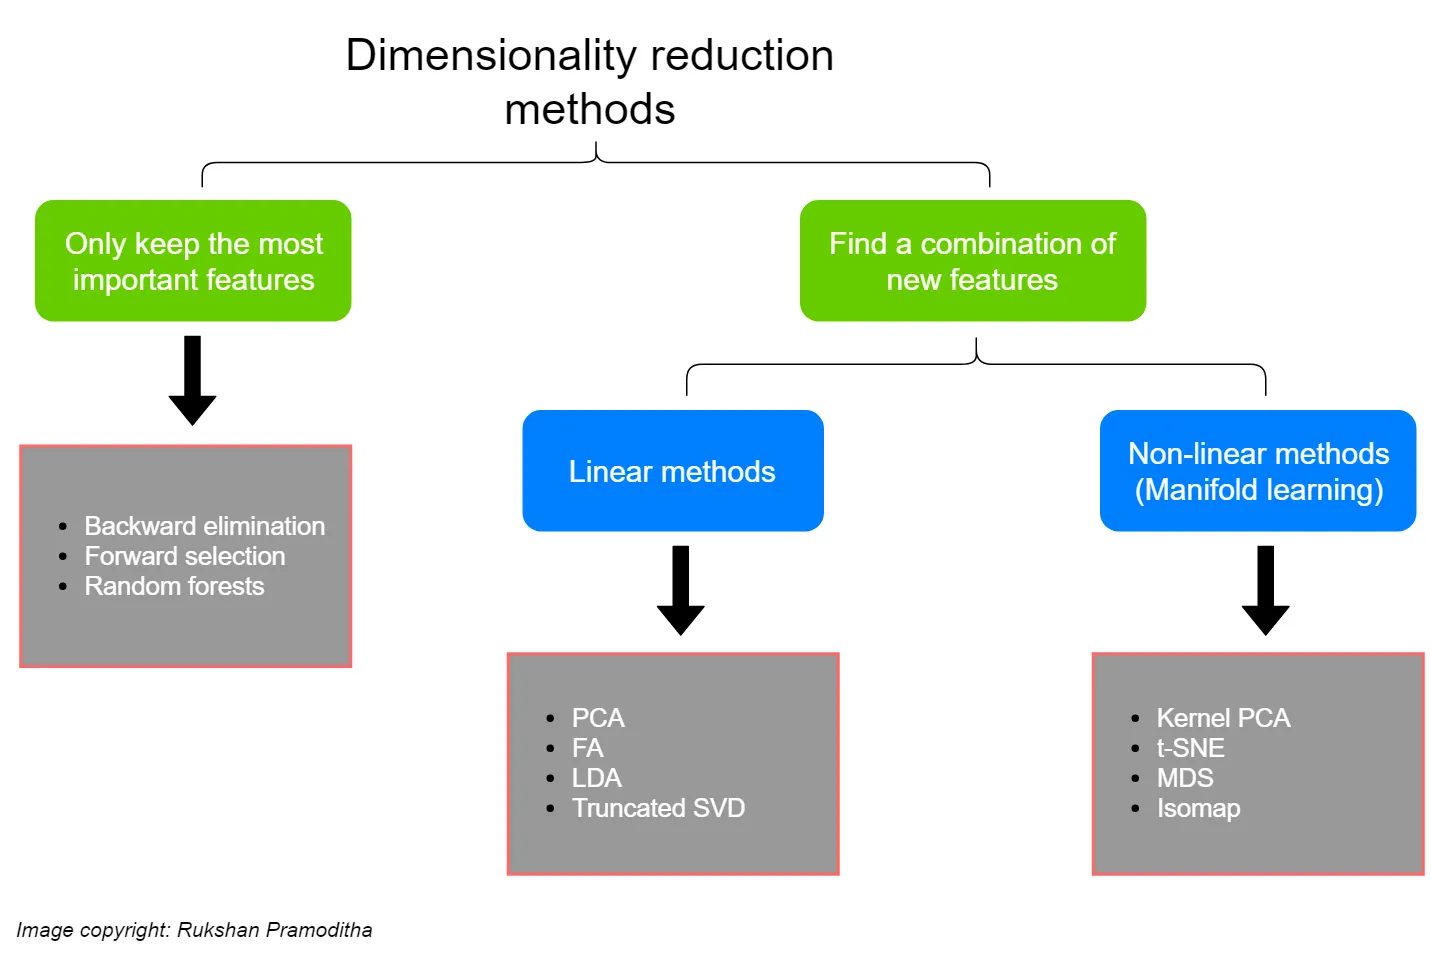

## There are two main approaches to dimensionality reduction:

1. **Linear methods**
2. **Non-linear methods (Manifold learning)**

## The curse of dimensionality
The curse of dimensionality arises when we’re working with very high-dimensional datasets. A large number of features requires a lot of computer resources, and a longer period of time to train. The calculations between the data points will become complex and harder when the number of dimensions is very high in the data. That kind of problem is often referred to as the curse of dimensionality in the context of machine learning.

Dimensionality reduction techniques can effectively address the curse of dimensionality. Once the dimensionality has been reduced, machine learning algorithms will be able to perform calculations very effectively and efficiently during training.

## What is principal component analysis (PCA)?

PCA is a linear dimensionality reduction technique. It transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.

PCA takes advantage of existing correlations between the input variables in the dataset and combines those correlated variables into a new set of uncorrelated variables.

PCA is an unsupervised machine learning algorithm as it does not require labels in the data.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [7]:
print("Shape of the data is:-" ,df.shape)
df.head()

Shape of the data is:- (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 1. Obtain the Feature Matrix

In [10]:
X = df.values
X.shape

(569, 30)

#### 2. Important step is Feature scaling
PCA requires feature scaling if there is a significant difference in the scale between the features of the dataset; for example, one feature ranges in values between 0 and 1 and another between 100 and 1,000. This is because PCA components are highly sensitive to the relative ranges of the original features¹ and PCA will attempt to capture the variance that occurred due to relative ranges, not the true variance between the features. We can apply z-score standardization to get all features into the same scale by using Scikit-learn StandardScaler() or MinMaxScaler() class which is in the preprocessing submodule in Scikit-learn.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### 3. Choose the right number of dimensions (k)

Now, we are ready to apply PCA to our dataset. Before that, we need to choose the right number of dimensions (i.e., the right number of principal components — k). For this, we apply PCA with the original number of dimensions (i.e., 30) and see how well PCA captures the variance of the data.

In Scikit-learn, PCA is applied using the PCA() class. It is in the decomposition submodule in Scikit-learn. The most important hyperparameter in that class is n_components. It can take one of the following types of values.

- **None:** This is the default value. If we do not specify the value, all components are kept. In our example, this exactly the same as n_components=30.
- **int:** If this is a positive integer like 1, 2, 30, 100, etc, the algorithm will return that number of principal components. The integer value should be less than or equal to the original number of features in the dataset.
- **float:** If 0 < n_components < 1, PCA will select the number of components such that the amount of variance that needs to be explained². For example, if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variance in the data.



In [28]:
from sklearn.decomposition import PCA
pca_30 = PCA(n_components=30, random_state = 2020)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

When applying PCA, all you need to do is to create an instance of the PCA() class and fit it using the scaled values of X. Then apply the transformation. The variable X_pca_30 stores the transformed values of the principal components returned by the PCA() class. X_pca_30 is a 569x30 two-dimensional Numpy array.

We have set n_components=30. The original number of dimensions in our dataset is also 30. We have not reduced the dimensionality, and therefore, the percentage of variance explained by 30 principal components should be 100%.

In [14]:
print("Variance explained by all 30 Principal component = ",sum(pca_30.explained_variance_ratio_ *100))

Variance explained by all 30 Principal component =  100.00000000000001


The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

In [16]:
pca_30.explained_variance_ratio_ *100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

The first component alone captures about 44.27% of the variability in the dataset and the second component alone captures about 18.97% of the variability in the dataset and so on. Also, note that the values of the above array are sorted in descending order. Taking the sum of the above array will return the total variance explained by each of the selected components.

If we get the cumulative sum of the above array, we can see the following array.

In [17]:
np.cumsum(pca_30.explained_variance_ratio_ *100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

Text(0.5, 1.0, 'elbow plot')

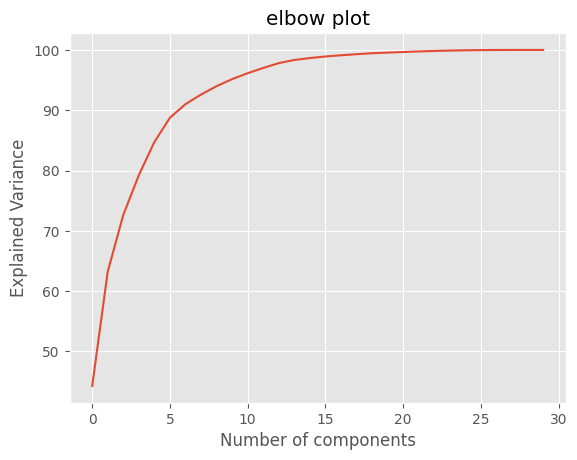

In [19]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('elbow plot')

**You can see that the first 10 principal components keep about 95.1% of the variability in the dataset while reducing 20 (30–10) features in the dataset. That’s great. The remaining 20 features only contain less than 5% of the variability in data.**

It is not possible to create a scatterplot for our breast_cancer dataset because it contains 30 features. Reducing the number of dimensions to two or three makes it possible to create a 2d scatterplot or 3d scatterplot which helps us to detect patterns such as clusters in our dataset. Therefore, dimensionality reduction is extremely useful for data visualization. But, keep in mind that, in our problem, if we create a 2d scatterplot using the first 2 principal components, it only explains about 63.24% of the variability in data and if we create a 3d scatterplot using the first 3 principal components, it only explains about 72.64% of the variability in data!

### 4. Apply PCA by setting n_components=2

Let’s apply PCA again to our dataset with n_components=2. This will transform our original data onto a two-dimensional space. This will return 2 components that capture 63.24% of the variability in data as I said earlier.

In [20]:
pca_2 = PCA(n_components = 2, random_state = 2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

In [21]:
X_pca_2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Now, we create a 2d scatterplot of the data using the values of the two principal components.

Text(0, 0.5, 'Second Principal Component')

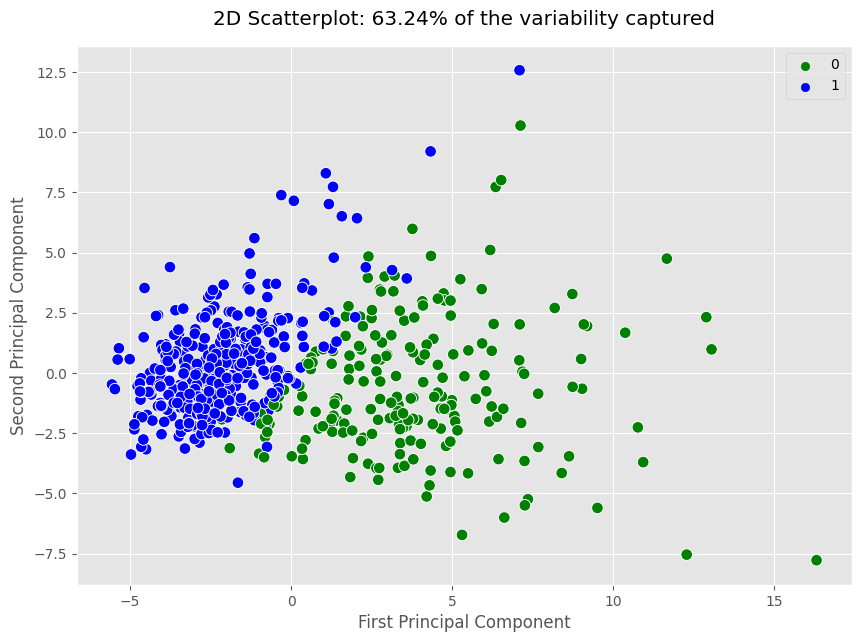

In [23]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = X_pca_2[:,0], y = X_pca_2[:,1], s = 70, hue = cancer.target, palette = ['green','blue'])
plt.title("2D Scatterplot: 63.24% of the variability captured", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

Another way to create the above 2d scatterplot is to use the Yellowbrick machine learning visualization library. Using the PCA Visualizer (an object that learns from data to produce a visualization), we can create an even more informative 2d scatterplot with a just few lines of code.

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

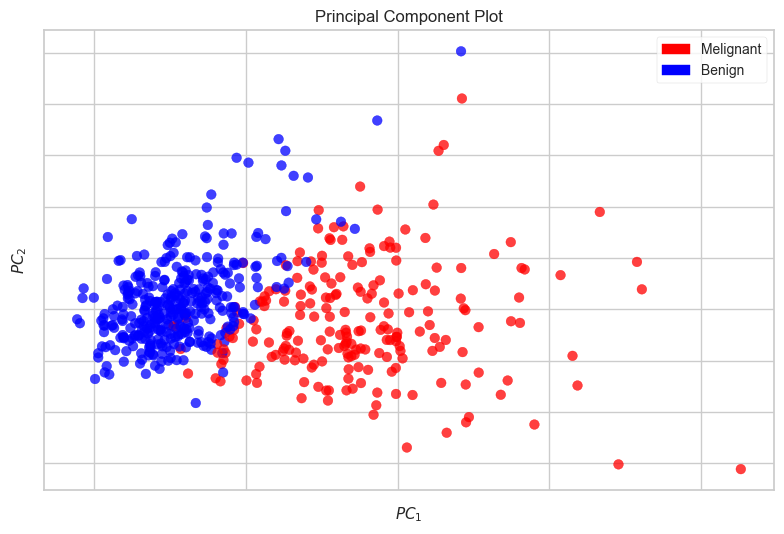

In [29]:
from yellowbrick.features import PCA as PCA1

visualizer_2 = PCA1(scale = True, projection = 2, classes = ['Melignant','Benign'],random_state = 2020,colors = ['red','blue'])
visualizer_2.fit_transform(X, cancer.target)
visualizer_2.show(outpath = '2-D Scatterplot for 2 PC')


### 5. Apply PCA by setting n_components=3
Let’s apply PCA to our dataset with n_components=3. This will transform our original data onto a three-dimensional space. This will return 3 components that capture 72.64% of the variability in data as I said earlier.

In [30]:
pca_3 = PCA(n_components = 3, random_state = 2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)
X_pca_3

array([[ 9.19283683,  1.94858305, -1.12316597],
       [ 2.3878018 , -3.7681717 , -0.52929307],
       [ 5.73389628, -1.07517379, -0.55174762],
       ...,
       [ 1.25617928, -1.90229672,  0.56273061],
       [10.37479406,  1.67201006, -1.87702887],
       [-5.4752433 , -0.67063675,  1.49044268]])

Text(0.5, 0, 'Third Principal Component')

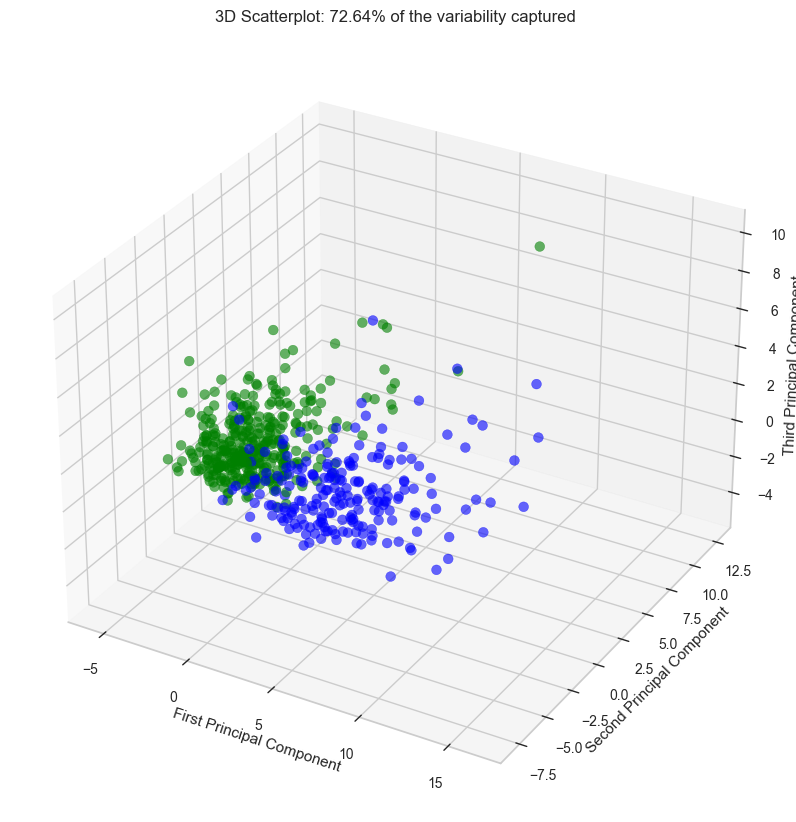

In [36]:
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize = (14,10))
ax = plt.axes(projection = '3d')

mycmap = ListedColormap(["blue", "red","green"])
sctt = ax.scatter3D(X_pca_3[:, 0],X_pca_3[:, 1],X_pca_3[:, 2],c = cancer.target, s = 50, alpha = 0.6,cmap=mycmap)
plt.title("3D Scatterplot: 72.64% of the variability captured", pad = 15)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

C:\Users\004GX3744\AppData\Local\anaconda3\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


<Axes3DSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

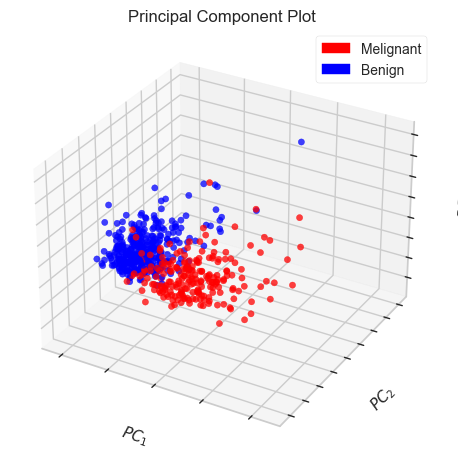

In [38]:
## Using YellowBrick
visualizer_3 = PCA1(scale = True, projection = 3, classes = ['Melignant','Benign'],random_state = 2020,colors = ['red','blue','green'])
visualizer_3.fit_transform(X, cancer.target)
visualizer_3.show(outpath = '3-D Scatterplot for 3 PC')

### 6. Apply PCA by setting n_components=0.95

Let’s apply PCA to our dataset with n_components=0.95. This will select the number of components while preserving 95% of the variability in the data.

In [40]:
pca_95 = PCA(n_components = 0.95, random_state = 2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)
print("Shape of the Data After preserving 95% of the Variability in the Data:- ",X_pca_95.shape)
X_pca_95

Shape of the Data After preserving 95% of the Variability in the Data:-  (569, 10)


array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

This means that the algorithm has found 10 principal components to preserve 95% of the variability in the data. The X_pca_95 array holds the values of all 10 principal components.

Let’s create a pandas DataFrame using the values of all 10 principal components and add the label column of the original dataset.

In [41]:
df_new = pd.DataFrame(X_pca_95, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df_new['label'] = cancer.target
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0


# We use PCA in Machine Learning when you have high dimensionality datasets that have a large number of features. High dimensionality datasets pose a number of problems — the most common being overfitting, which reduces the ability to generalize beyond what is in the training set

In [43]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [44]:
## Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = df.copy()
data['label'] = cancer.target
X = data.iloc[:,:-1]      
y = data.iloc[:,-1]
#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.9239766081871345

In [46]:
### After 95% Preserving of Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
components = len(pca_95.explained_variance_ratio_)
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [47]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('regressor', LogisticRegression())])

In [48]:
log_regress_model.score(X_test,y_test)

0.9766081871345029

# For 85% of data Accuracy of the model is 0.9824561403508771

In [3]:
import pandas as pd
f = pd.DataFrame({'Id':[1,2,3,4],'Name':['a','b','c','d']})
pd.set_index('Id')['Name'].to_dict()
                

AttributeError: module 'pandas' has no attribute 'set_index'